In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
df = pd.read_csv('SJT-Tfr1.csv',parse_dates=['Datetime'])

In [4]:
df.head()

ID            Datetime  RealEnergyWH  LineVoltageVRY  LineVoltageVYB  \
0   1 2006-12-16 17:24:00        874408          416.42          419.65   
1   2 2006-12-16 17:26:00        874434          419.55          422.42   
2   3 2006-12-16 17:28:00        874444          420.47          423.36   
3   4 2006-12-16 17:30:00        874453          414.77          417.46   
4   5 2006-12-16 17:32:00        874463          413.01          415.77   

   LineVoltageVBR  LineCurrentIR  LineCurrentIY  LineCurrentIB  RealPower  \
0          421.65         689.44         580.63         481.54  424113.31   
1          423.31         603.30         535.62         427.29  380890.97   
2          424.67         576.12         499.41         402.67  360707.31   
3          419.91         641.52         540.84         442.57  391518.84   
4          418.76         627.82         514.14         422.16  375052.62   

   PowerFactor  Frequency  
0         -1.0       50.1  
1          1.0       50.1  
2         -1.0       50.1  
3         -1.0       50.1  
4          1.0       49.9

In [5]:
df['Date'] = pd.to_datetime(df['Datetime']).dt.date
df['Time'] = pd.to_datetime(df['Datetime']).dt.time
df['Month'] = pd.to_datetime(df['Datetime']).dt.month
df['Day'] = pd.to_datetime(df['Datetime']).dt.day_name()
#df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour

In [6]:
df.head()

ID            Datetime  RealEnergyWH  LineVoltageVRY  LineVoltageVYB  \
0   1 2006-12-16 17:24:00        874408          416.42          419.65   
1   2 2006-12-16 17:26:00        874434          419.55          422.42   
2   3 2006-12-16 17:28:00        874444          420.47          423.36   
3   4 2006-12-16 17:30:00        874453          414.77          417.46   
4   5 2006-12-16 17:32:00        874463          413.01          415.77   

   LineVoltageVBR  LineCurrentIR  LineCurrentIY  LineCurrentIB  RealPower  \
0          421.65         689.44         580.63         481.54  424113.31   
1          423.31         603.30         535.62         427.29  380890.97   
2          424.67         576.12         499.41         402.67  360707.31   
3          419.91         641.52         540.84         442.57  391518.84   
4          418.76         627.82         514.14         422.16  375052.62   

   PowerFactor  Frequency        Date      Time  Month       Day  
0         -1.0       50.1  2006-12-16  17:24:00     12  Saturday  
1          1.0       50.1  2006-12-16  17:26:00     12  Saturday  
2         -1.0       50.1  2006-12-16  17:28:00     12  Saturday  
3         -1.0       50.1  2006-12-16  17:30:00     12  Saturday  
4          1.0       49.9  2006-12-16  17:32:00     12  Saturday

In [8]:
df.Month.unique()

array([12,  1,  2,  3])

In [9]:
df.Date.nunique()

80

In [10]:
df.index = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S')
df.head()

ID            Datetime  RealEnergyWH  LineVoltageVRY  \
Datetime                                                                    
2006-12-16 17:24:00   1 2006-12-16 17:24:00        874408          416.42   
2006-12-16 17:26:00   2 2006-12-16 17:26:00        874434          419.55   
2006-12-16 17:28:00   3 2006-12-16 17:28:00        874444          420.47   
2006-12-16 17:30:00   4 2006-12-16 17:30:00        874453          414.77   
2006-12-16 17:32:00   5 2006-12-16 17:32:00        874463          413.01   

                     LineVoltageVYB  LineVoltageVBR  LineCurrentIR  \
Datetime                                                             
2006-12-16 17:24:00          419.65          421.65         689.44   
2006-12-16 17:26:00          422.42          423.31         603.30   
2006-12-16 17:28:00          423.36          424.67         576.12   
2006-12-16 17:30:00          417.46          419.91         641.52   
2006-12-16 17:32:00          415.77          418.76         627.82   

                     LineCurrentIY  LineCurrentIB  RealPower  PowerFactor  \
Datetime                                                                    
2006-12-16 17:24:00         580.63         481.54  424113.31         -1.0   
2006-12-16 17:26:00         535.62         427.29  380890.97          1.0   
2006-12-16 17:28:00         499.41         402.67  360707.31         -1.0   
2006-12-16 17:30:00         540.84         442.57  391518.84         -1.0   
2006-12-16 17:32:00         514.14         422.16  375052.62          1.0   

                     Frequency        Date      Time  Month       Day  
Datetime                                                               
2006-12-16 17:24:00       50.1  2006-12-16  17:24:00     12  Saturday  
2006-12-16 17:26:00       50.1  2006-12-16  17:26:00     12  Saturday  
2006-12-16 17:28:00       50.1  2006-12-16  17:28:00     12  Saturday  
2006-12-16 17:30:00       50.1  2006-12-16  17:30:00     12  Saturday  
2006-12-16 17:32:00       49.9  2006-12-16  17:32:00     12  Saturday

In [11]:
df.dtypes

ID                         int64
Datetime          datetime64[ns]
RealEnergyWH               int64
LineVoltageVRY           float64
LineVoltageVYB           float64
LineVoltageVBR           float64
LineCurrentIR            float64
LineCurrentIY            float64
LineCurrentIB            float64
RealPower                float64
PowerFactor              float64
Frequency                float64
Date                      object
Time                      object
Month                      int32
Day                       object
dtype: object

# DataSet Visualisation

In [12]:
from plotly import __version__

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [13]:
init_notebook_mode(connected=True)

cf.go_offline()

In [14]:
df['RealPower'].iplot()

In [15]:
df['RealPower'].iplot(kind='hist')

In [17]:
from matplotlib import rcParams

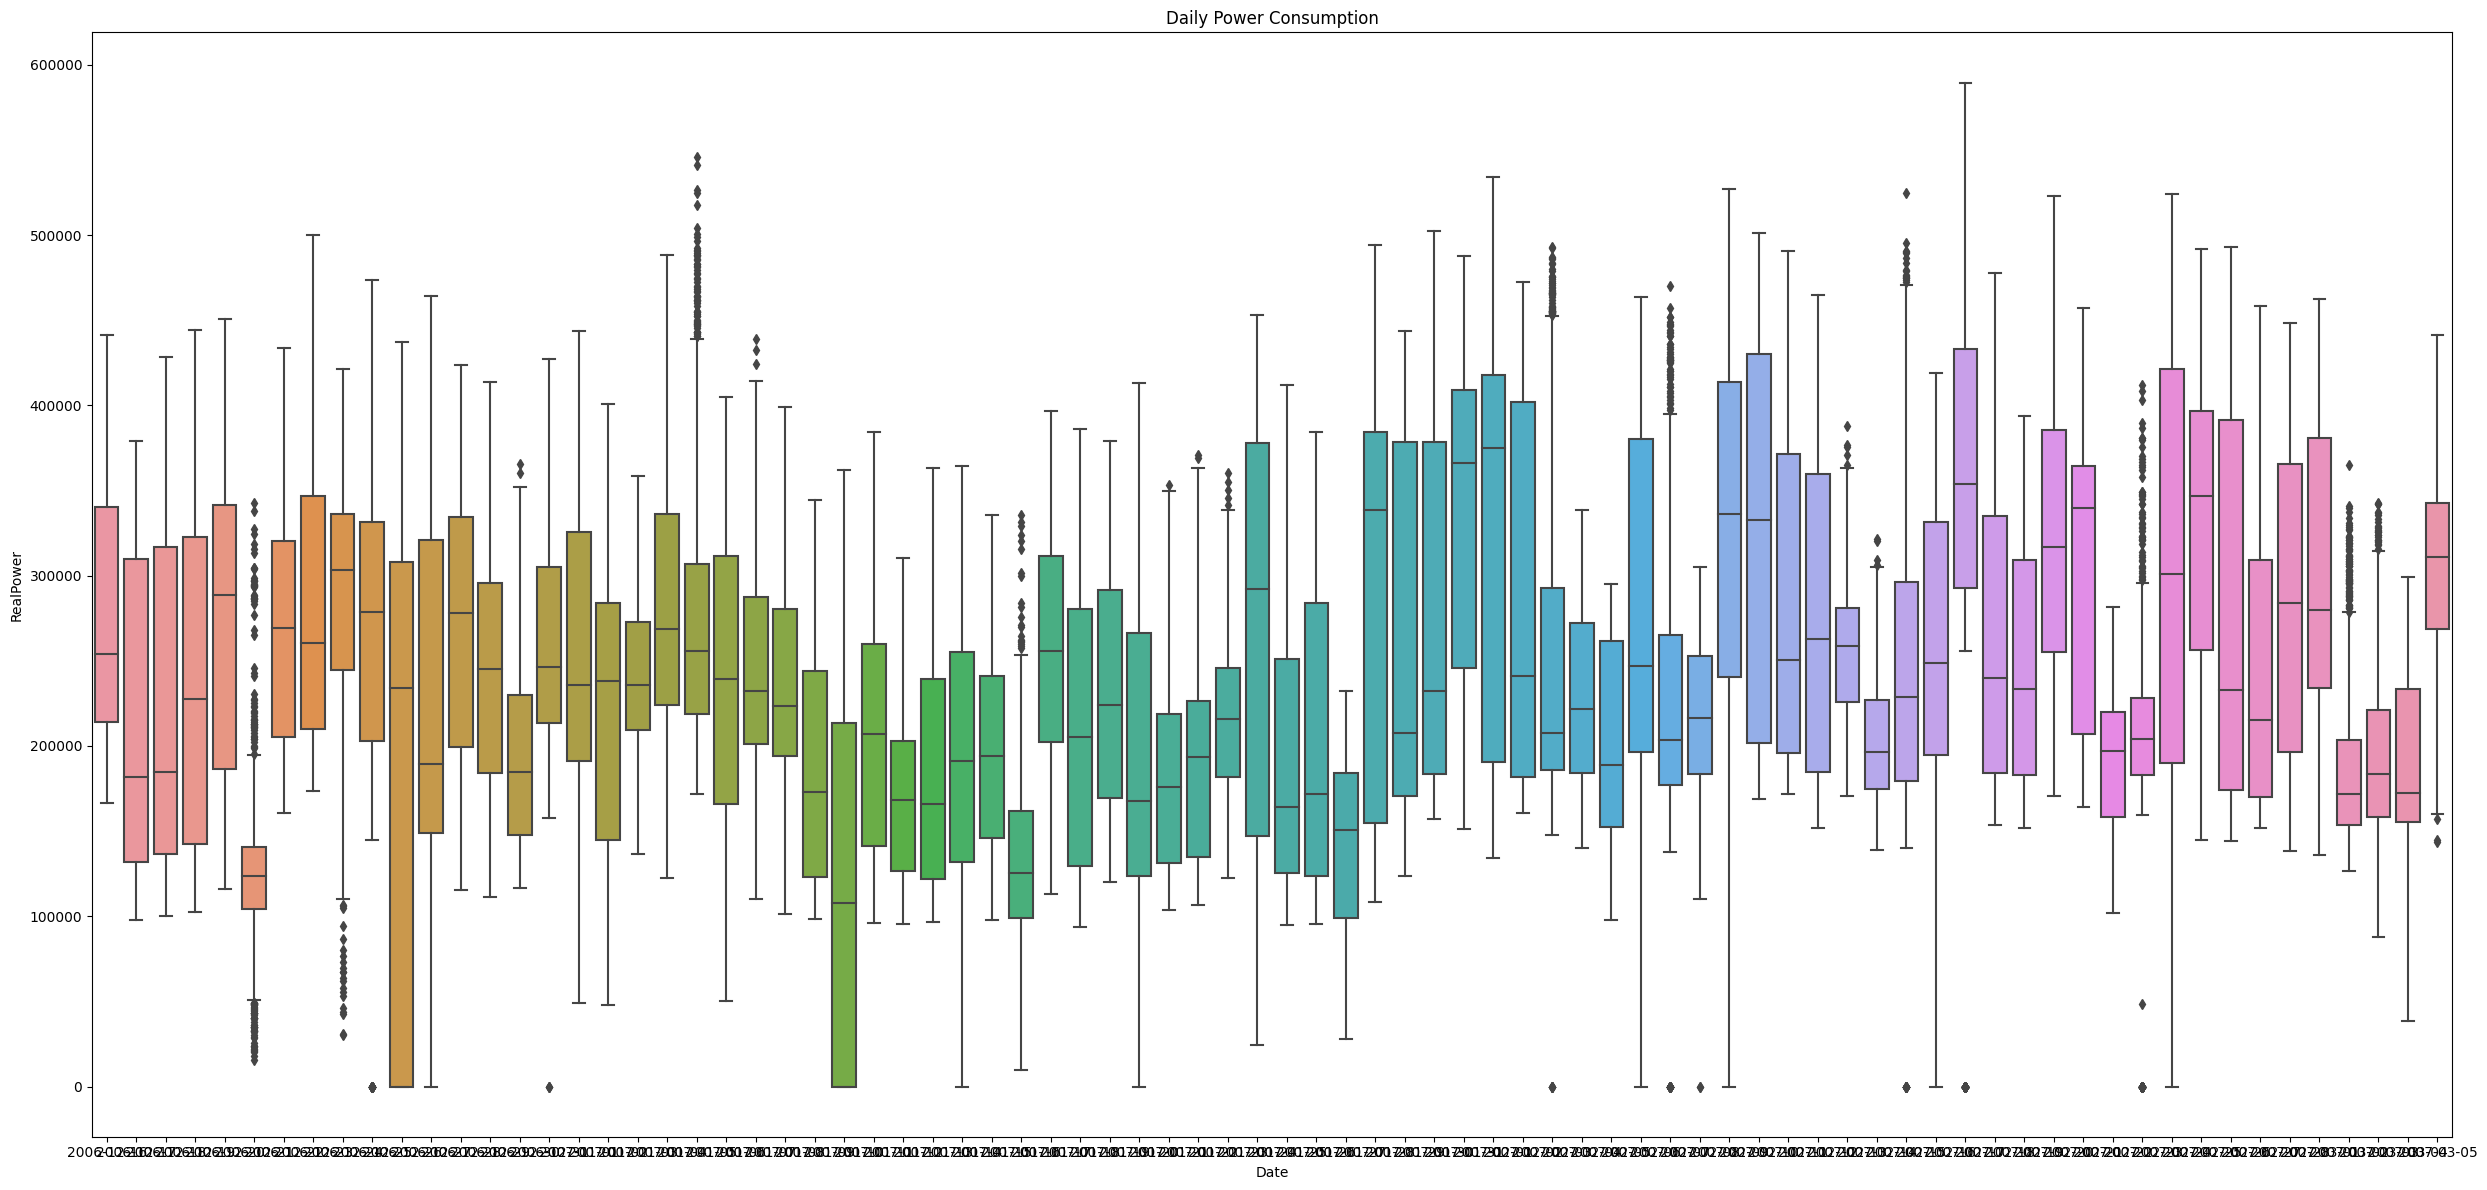

In [18]:
rcParams['figure.figsize'] = 25, 12
sns.boxplot(x = df['Date'], y = df['RealPower'], data = df)
plt.title('Daily Power Consumption')
plt.tight_layout()

Text(0.5, 1.0, 'Monthly Power Consumption')

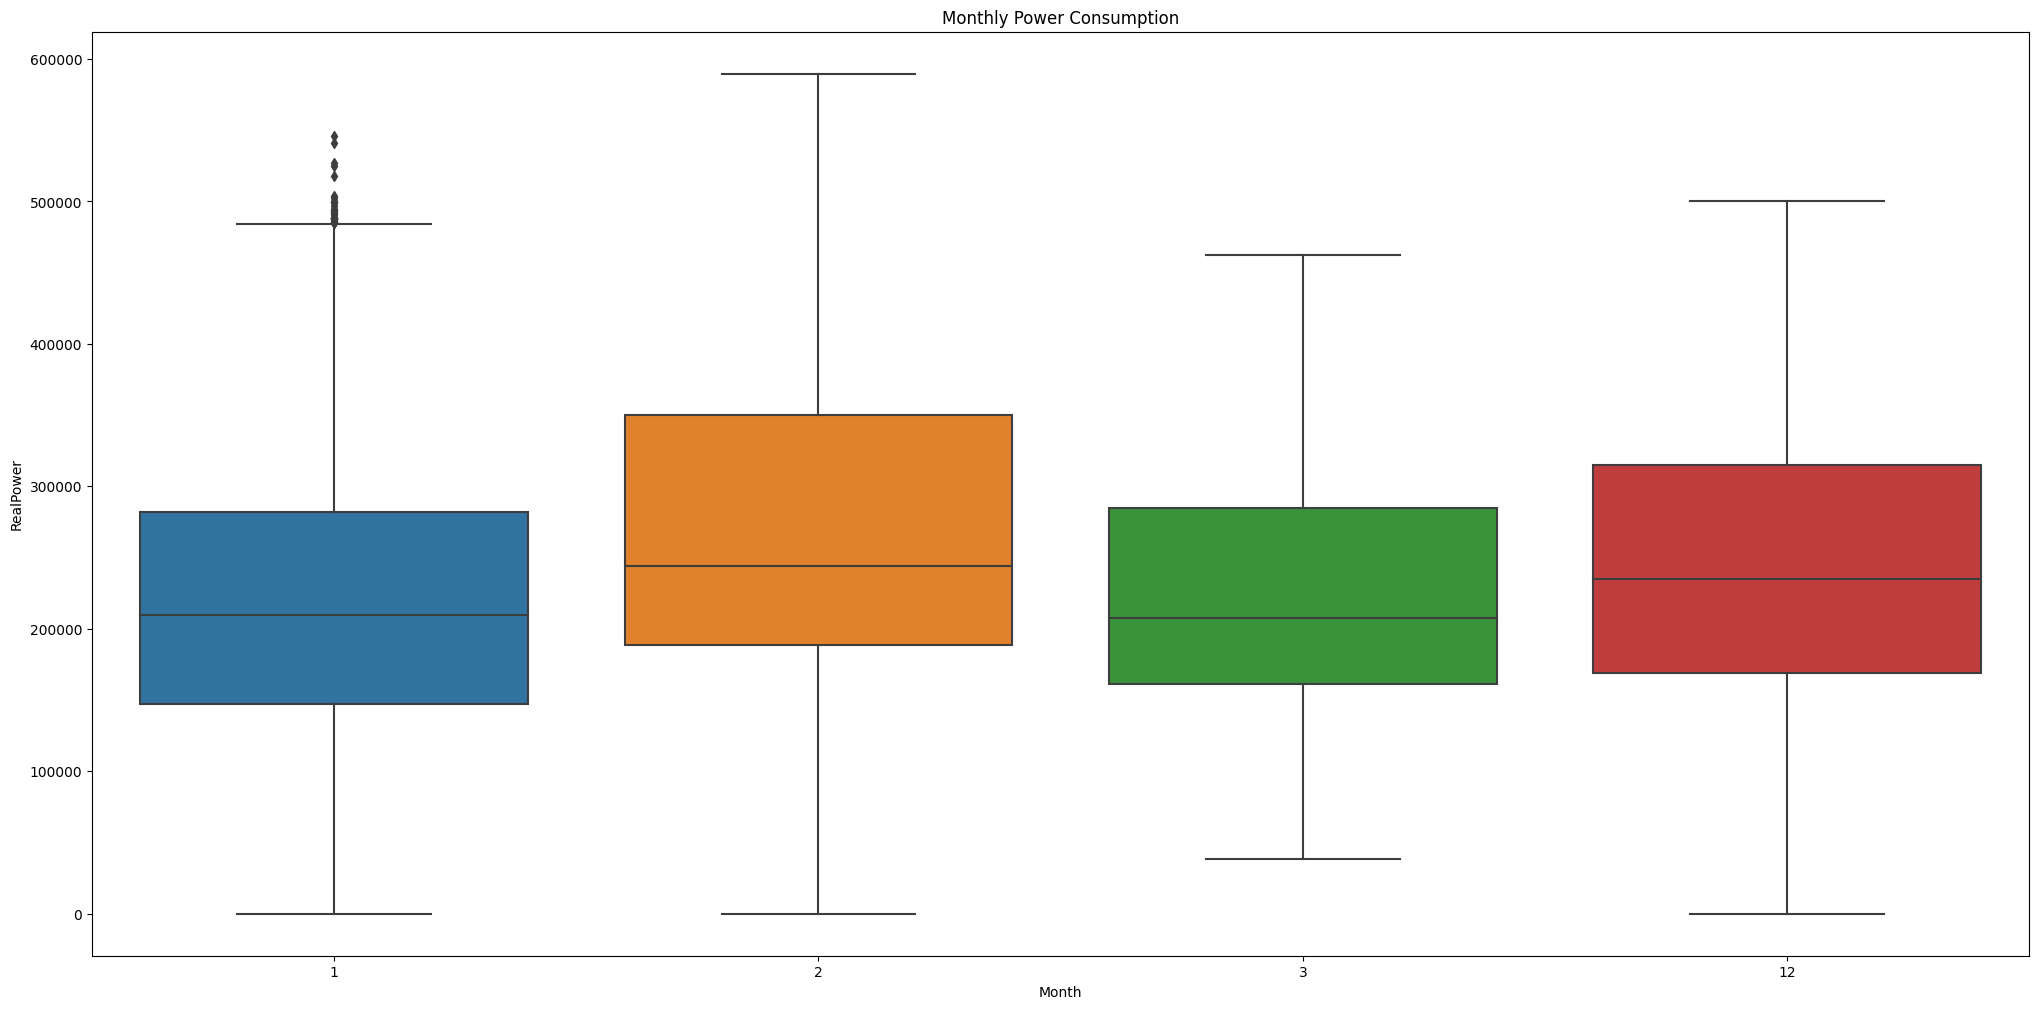

In [19]:
rcParams['figure.figsize'] = 25, 12
sns.boxplot(x = df['Month'], y = df['RealPower'], data = df)
plt.title('Monthly Power Consumption')

Text(0.5, 1.0, 'Day Wise Power Consumption')

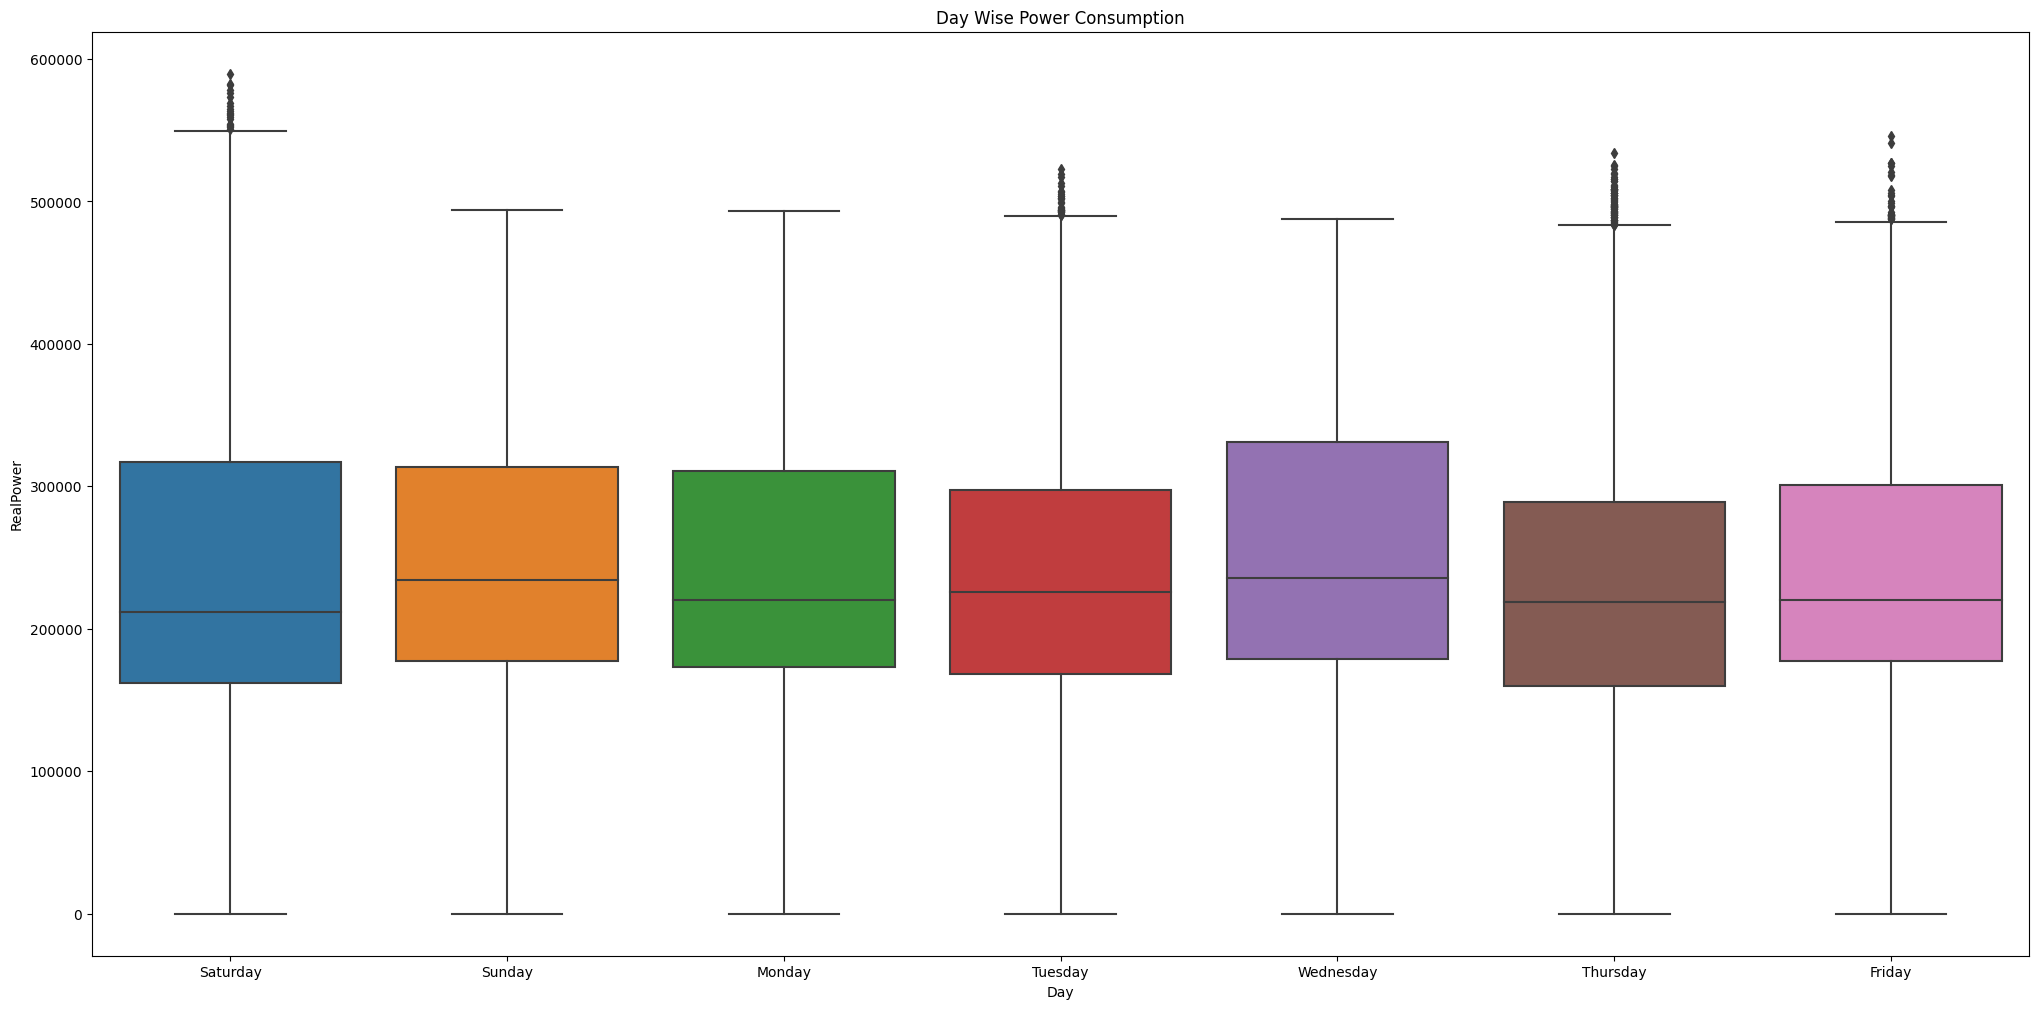

In [20]:
rcParams['figure.figsize'] = 25, 12
sns.boxplot(x = df['Day'], y = df['RealPower'], data = df)
plt.title('Day Wise Power Consumption')

In [21]:
table = df.pivot_table(values = 'RealPower', index = "Day", columns="Month")

In [22]:
table

Month                 1              2              3              12
Day                                                                  
Friday     221009.130309  262557.396260  190294.369556  256070.065035
Monday     226159.817567  250806.961292  300555.333917  244325.297840
Saturday   189826.900024  297653.011076  198674.002056  243579.924646
Sunday     228619.954965  272726.687250  186904.371125  255633.990801
Thursday   220736.154319  249320.647514  294213.753347  197616.418542
Tuesday    205708.842100  273778.761417            NaN  216044.447153
Wednesday  241137.419475  251324.352854            NaN  252295.582132

<Axes: xlabel='Month', ylabel='Day'>

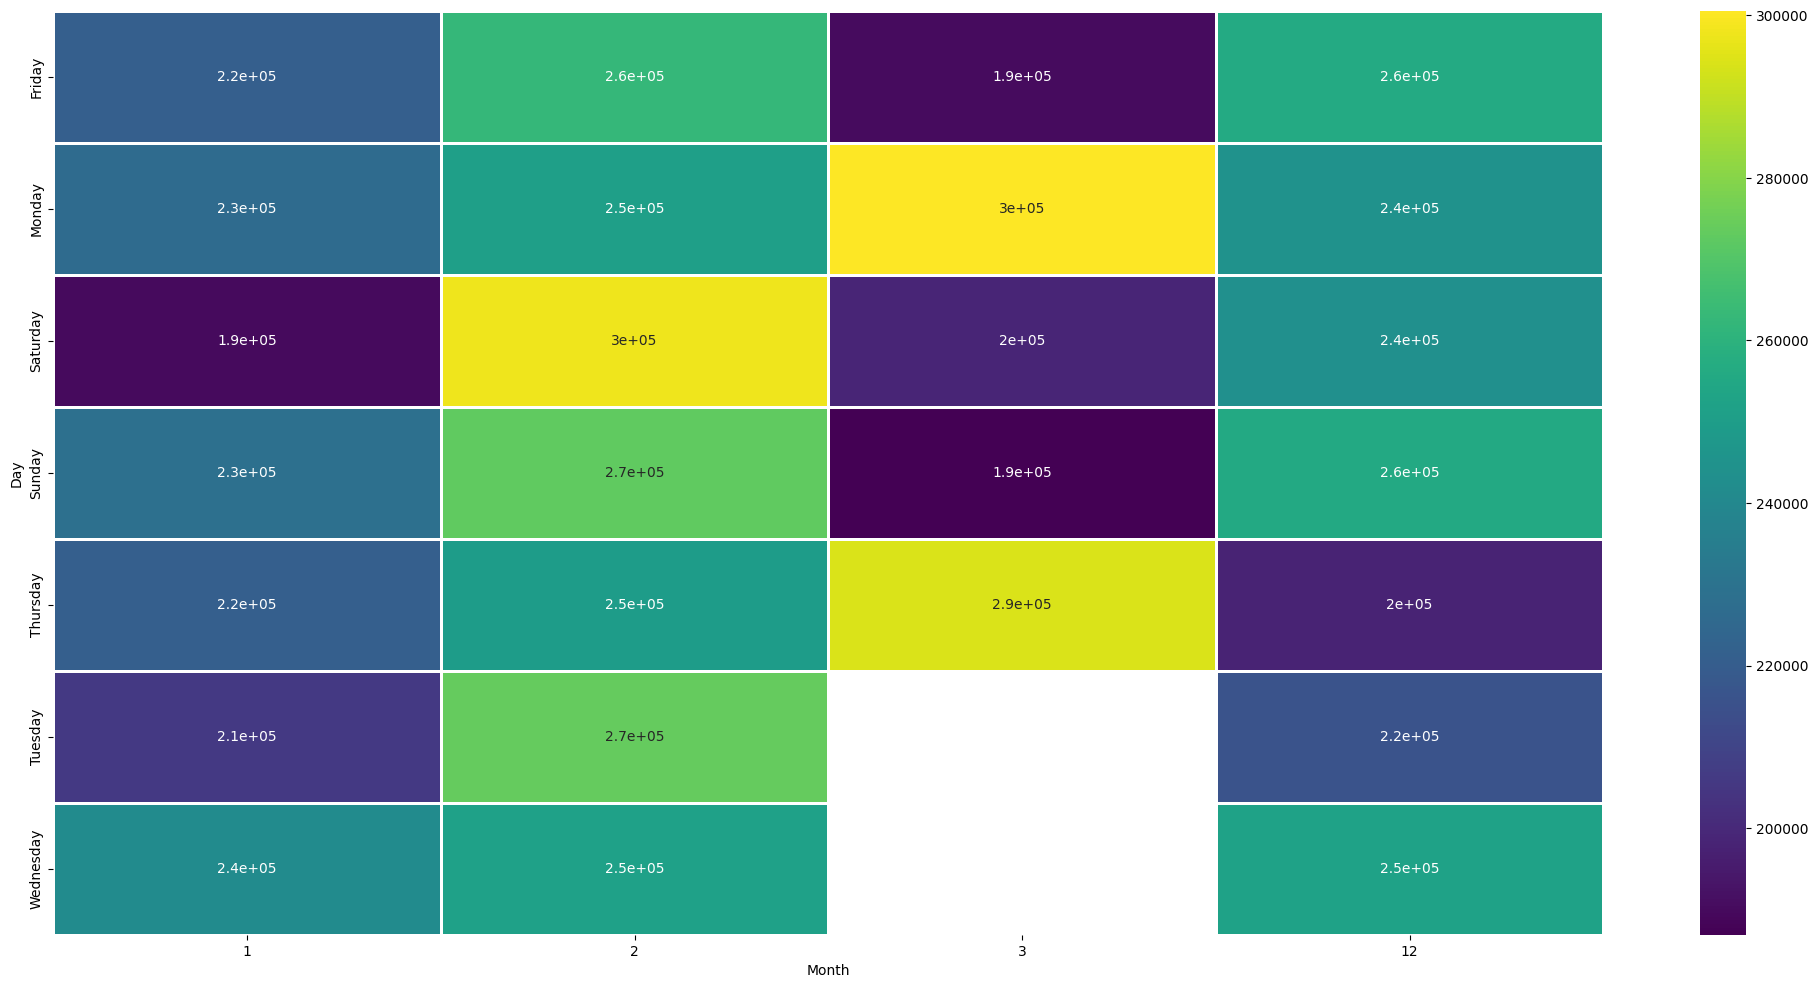

In [23]:
sns.heatmap(table, annot=True, linewidths=1, cmap='viridis')

In [24]:
df.columns

Index(['ID', 'Datetime', 'RealEnergyWH', 'LineVoltageVRY', 'LineVoltageVYB',
       'LineVoltageVBR', 'LineCurrentIR', 'LineCurrentIY', 'LineCurrentIB',
       'RealPower', 'PowerFactor', 'Frequency', 'Date', 'Time', 'Month',
       'Day'],
      dtype='object')

In [25]:
df.head()

ID            Datetime  RealEnergyWH  LineVoltageVRY  \
Datetime                                                                    
2006-12-16 17:24:00   1 2006-12-16 17:24:00        874408          416.42   
2006-12-16 17:26:00   2 2006-12-16 17:26:00        874434          419.55   
2006-12-16 17:28:00   3 2006-12-16 17:28:00        874444          420.47   
2006-12-16 17:30:00   4 2006-12-16 17:30:00        874453          414.77   
2006-12-16 17:32:00   5 2006-12-16 17:32:00        874463          413.01   

                     LineVoltageVYB  LineVoltageVBR  LineCurrentIR  \
Datetime                                                             
2006-12-16 17:24:00          419.65          421.65         689.44   
2006-12-16 17:26:00          422.42          423.31         603.30   
2006-12-16 17:28:00          423.36          424.67         576.12   
2006-12-16 17:30:00          417.46          419.91         641.52   
2006-12-16 17:32:00          415.77          418.76         627.82   

                     LineCurrentIY  LineCurrentIB  RealPower  PowerFactor  \
Datetime                                                                    
2006-12-16 17:24:00         580.63         481.54  424113.31         -1.0   
2006-12-16 17:26:00         535.62         427.29  380890.97          1.0   
2006-12-16 17:28:00         499.41         402.67  360707.31         -1.0   
2006-12-16 17:30:00         540.84         442.57  391518.84         -1.0   
2006-12-16 17:32:00         514.14         422.16  375052.62          1.0   

                     Frequency        Date      Time  Month       Day  
Datetime                                                               
2006-12-16 17:24:00       50.1  2006-12-16  17:24:00     12  Saturday  
2006-12-16 17:26:00       50.1  2006-12-16  17:26:00     12  Saturday  
2006-12-16 17:28:00       50.1  2006-12-16  17:28:00     12  Saturday  
2006-12-16 17:30:00       50.1  2006-12-16  17:30:00     12  Saturday  
2006-12-16 17:32:00       49.9  2006-12-16  17:32:00     12  Saturday

# MODEL FOR PREDICTION

In [26]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

## For Daily basis Prediction

In [27]:
data= df.drop(['ID', 'Datetime', 'RealEnergyWH', 'LineVoltageVRY', 'LineVoltageVYB',
       'LineVoltageVBR', 'LineCurrentIR', 'LineCurrentIY', 'LineCurrentIB', 
                'PowerFactor', 'Frequency', 'Date', 'Time', 'Month',
       'Day'], axis = 1)

In [28]:
data.index = pd.to_datetime(df['Date'], format='%Y.%m.%d')
data.head()

RealPower
Date                 
2006-12-16  424113.31
2006-12-16  380890.97
2006-12-16  360707.31
2006-12-16  391518.84
2006-12-16  375052.62

In [29]:
data.shape

(56792, 1)

In [30]:
### Data Set For daily predictions
DataSet_Daily = data.resample('D').mean()

In [31]:
print(DataSet_Daily.size)
print(DataSet_Daily.shape)

80
(80, 1)


In [32]:
DataSet_Daily.head()

RealPower
Date                     
2006-12-16  278811.959545
2006-12-17  219499.872986
2006-12-18  217916.762556
2006-12-19  234796.073264
2006-12-20  274878.817597

In [33]:
# define input sequence
timeseries_data_daily = np.array(DataSet_Daily).reshape(DataSet_Daily.size, )
n_steps = 3
# split into samples
X1, y1 = prepare_data(timeseries_data_daily, n_steps)

In [34]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [35]:
# define model
model_daily = Sequential()
model_daily.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_daily.add(LSTM(50, activation='relu'))
model_daily.add(Dense(1))
model_daily.compile(optimizer='adam', loss='mse')
# fit model
model_daily.fit(X1, y1, epochs=300, verbose=1)

Epoch 1/300
3/3 [==============================] - 3s 8ms/step - loss: 58272526336.0000
Epoch 2/300
3/3 [==============================] - 0s 5ms/step - loss: 56291934208.0000
Epoch 3/300
3/3 [==============================] - 0s 4ms/step - loss: 54720860160.0000
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 53200158720.0000
Epoch 5/300
3/3 [==============================] - 0s 5ms/step - loss: 52010037248.0000
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 51060535296.0000
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 50077761536.0000
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 48799936512.0000
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 47431639040.0000
Epoch 10/300
3/3 [==============================] - 0s 4ms/step - loss: 46026174464.0000
Epoch 11/300
3/3 [==============================] - 0s 4ms/step - loss: 44216246272.0000
Epoch 12/300
3/3 [============

3/3 [==============================] - 0s 5ms/step - loss: 2786304256.0000
Epoch 94/300
3/3 [==============================] - 0s 4ms/step - loss: 2781333248.0000
Epoch 95/300
3/3 [==============================] - 0s 4ms/step - loss: 2776174080.0000
Epoch 96/300
3/3 [==============================] - 0s 4ms/step - loss: 2774096384.0000
Epoch 97/300
3/3 [==============================] - 0s 4ms/step - loss: 2775292928.0000
Epoch 98/300
3/3 [==============================] - 0s 5ms/step - loss: 2776216832.0000
Epoch 99/300
3/3 [==============================] - 0s 5ms/step - loss: 2775996928.0000
Epoch 100/300
3/3 [==============================] - 0s 4ms/step - loss: 2769664512.0000
Epoch 101/300
3/3 [==============================] - 0s 4ms/step - loss: 2766896640.0000
Epoch 102/300
3/3 [==============================] - 0s 4ms/step - loss: 2769415680.0000
Epoch 103/300
3/3 [==============================] - 0s 4ms/step - loss: 2763873024.0000
Epoch 104/300
3/3 [======================

3/3 [==============================] - 0s 4ms/step - loss: 2896271616.0000
Epoch 186/300
3/3 [==============================] - 0s 4ms/step - loss: 2925500672.0000
Epoch 187/300
3/3 [==============================] - 0s 4ms/step - loss: 2921387264.0000
Epoch 188/300
3/3 [==============================] - 0s 4ms/step - loss: 2913346560.0000
Epoch 189/300
3/3 [==============================] - 0s 5ms/step - loss: 2904374784.0000
Epoch 190/300
3/3 [==============================] - 0s 5ms/step - loss: 2901363712.0000
Epoch 191/300
3/3 [==============================] - 0s 5ms/step - loss: 2889479168.0000
Epoch 192/300
3/3 [==============================] - 0s 5ms/step - loss: 2880722176.0000
Epoch 193/300
3/3 [==============================] - 0s 4ms/step - loss: 2868731136.0000
Epoch 194/300
3/3 [==============================] - 0s 4ms/step - loss: 2860424704.0000
Epoch 195/300
3/3 [==============================] - 0s 4ms/step - loss: 2874562048.0000
Epoch 196/300
3/3 [================

3/3 [==============================] - 0s 5ms/step - loss: 2547167744.0000
Epoch 278/300
3/3 [==============================] - 0s 5ms/step - loss: 2541310720.0000
Epoch 279/300
3/3 [==============================] - 0s 5ms/step - loss: 2539678464.0000
Epoch 280/300
3/3 [==============================] - 0s 5ms/step - loss: 2538965504.0000
Epoch 281/300
3/3 [==============================] - 0s 4ms/step - loss: 2542516224.0000
Epoch 282/300
3/3 [==============================] - 0s 4ms/step - loss: 2542417664.0000
Epoch 283/300
3/3 [==============================] - 0s 4ms/step - loss: 2542668800.0000
Epoch 284/300
3/3 [==============================] - 0s 5ms/step - loss: 2540473600.0000
Epoch 285/300
3/3 [==============================] - 0s 5ms/step - loss: 2540887808.0000
Epoch 286/300
3/3 [==============================] - 0s 5ms/step - loss: 2538954752.0000
Epoch 287/300
3/3 [==============================] - 0s 4ms/step - loss: 2536353280.0000
Epoch 288/300
3/3 [================

In [36]:
## Input
#x_input = timeseries_data_daily[-3:]

## Minute wise Prediction

In [37]:
DataSet_min= df.drop(['ID', 'Datetime', 'RealEnergyWH', 'LineVoltageVRY', 'LineVoltageVYB',
       'LineVoltageVBR', 'LineCurrentIR', 'LineCurrentIY', 'LineCurrentIB', 
                'PowerFactor', 'Frequency', 'Date', 'Time', 'Month',
       'Day'], axis = 1)

In [38]:
DataSet_min.index = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S')
DataSet_min.head()

RealPower
Datetime                      
2006-12-16 17:24:00  424113.31
2006-12-16 17:26:00  380890.97
2006-12-16 17:28:00  360707.31
2006-12-16 17:30:00  391518.84
2006-12-16 17:32:00  375052.62

In [39]:
# define input sequence
timeseries_data_min = np.array(DataSet_min).reshape(DataSet_min.size, )
n_steps = 3
# split into samples
X2, y2 = prepare_data(timeseries_data_min, n_steps)

In [40]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))

In [41]:
# define model
model_min = Sequential()
model_min.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_min.add(LSTM(50, activation='relu'))
model_min.add(Dense(1))
model_min.compile(optimizer='adam', loss='mse')
# fit model
model_min.fit(X2, y2, epochs=300, verbose=1)

Epoch 1/300
1775/1775 [==============================] - 8s 3ms/step - loss: 2044867072.0000
Epoch 2/300
1775/1775 [==============================] - 6s 3ms/step - loss: 399465920.0000
Epoch 3/300
1775/1775 [==============================] - 6s 3ms/step - loss: 377314464.0000
Epoch 4/300
1775/1775 [==============================] - 6s 3ms/step - loss: 378127744.0000
Epoch 5/300
1775/1775 [==============================] - 6s 3ms/step - loss: 373049216.0000
Epoch 6/300
1775/1775 [==============================] - 6s 3ms/step - loss: 375002496.0000
Epoch 7/300
1775/1775 [==============================] - 6s 3ms/step - loss: 389380992.0000
Epoch 8/300
1775/1775 [==============================] - 6s 3ms/step - loss: 372985920.0000
Epoch 9/300
1775/1775 [==============================] - 6s 3ms/step - loss: 370220096.0000
Epoch 10/300
1775/1775 [==============================] - 6s 3ms/step - loss: 366461440.0000
Epoch 11/300
1775/1775 [==============================] - 6s 3ms/step - loss: 

1775/1775 [==============================] - 6s 3ms/step - loss: 325934080.0000
Epoch 90/300
1775/1775 [==============================] - 6s 3ms/step - loss: 345057408.0000
Epoch 91/300
1775/1775 [==============================] - 6s 3ms/step - loss: 326607456.0000
Epoch 92/300
1775/1775 [==============================] - 6s 3ms/step - loss: 326561920.0000
Epoch 93/300
1775/1775 [==============================] - 6s 3ms/step - loss: 326850304.0000
Epoch 94/300
1775/1775 [==============================] - 6s 3ms/step - loss: 327316672.0000
Epoch 95/300
1775/1775 [==============================] - 6s 3ms/step - loss: 327656704.0000
Epoch 96/300
1775/1775 [==============================] - 6s 3ms/step - loss: 328106816.0000
Epoch 97/300
1775/1775 [==============================] - 6s 3ms/step - loss: 335843872.0000
Epoch 98/300
1775/1775 [==============================] - 6s 3ms/step - loss: 328214208.0000
Epoch 99/300
1775/1775 [==============================] - 6s 3ms/step - loss: 32922

1775/1775 [==============================] - 5s 3ms/step - loss: 324429664.0000
Epoch 177/300
1775/1775 [==============================] - 5s 3ms/step - loss: 324965120.0000
Epoch 178/300
1775/1775 [==============================] - 5s 3ms/step - loss: 325325376.0000
Epoch 179/300
1775/1775 [==============================] - 5s 3ms/step - loss: 324730368.0000
Epoch 180/300
1775/1775 [==============================] - 5s 3ms/step - loss: 324332480.0000
Epoch 181/300
1775/1775 [==============================] - 5s 3ms/step - loss: 325588672.0000
Epoch 182/300
1775/1775 [==============================] - 5s 3ms/step - loss: 326398848.0000
Epoch 183/300
1775/1775 [==============================] - 5s 3ms/step - loss: 326119008.0000
Epoch 184/300
1775/1775 [==============================] - 5s 3ms/step - loss: 326338336.0000
Epoch 185/300
1775/1775 [==============================] - 5s 3ms/step - loss: 324961984.0000
Epoch 186/300
1775/1775 [==============================] - 5s 3ms/step - l

1775/1775 [==============================] - 3s 1ms/step - loss: 325420768.0000
Epoch 264/300
1775/1775 [==============================] - 3s 1ms/step - loss: 325809376.0000
Epoch 265/300
1775/1775 [==============================] - 3s 1ms/step - loss: 325435424.0000
Epoch 266/300
1775/1775 [==============================] - 3s 1ms/step - loss: 325008832.0000
Epoch 267/300
1775/1775 [==============================] - 3s 1ms/step - loss: 325035808.0000
Epoch 268/300
1775/1775 [==============================] - 3s 1ms/step - loss: 325029216.0000
Epoch 269/300
1775/1775 [==============================] - 3s 1ms/step - loss: 324634912.0000
Epoch 270/300
1775/1775 [==============================] - 2s 1ms/step - loss: 324509760.0000
Epoch 271/300
1775/1775 [==============================] - 3s 1ms/step - loss: 324541728.0000
Epoch 272/300
1775/1775 [==============================] - 3s 1ms/step - loss: 324580480.0000
Epoch 273/300
1775/1775 [==============================] - 3s 1ms/step - l

## Weekly Prediction

In [42]:
DataSet_Weekly = data.resample('W').mean()

In [43]:
DataSet_Weekly

RealPower
Date                     
2006-12-17  232292.675969
2006-12-24  241796.175351
2006-12-31  237857.647579
2007-01-07  249978.200004
2007-01-14  183747.163887
2007-01-21  200361.979688
2007-01-28  215235.510966
2007-02-04  279380.198633
2007-02-11  259768.388087
2007-02-18  264687.983599
2007-02-25  266085.093242
2007-03-04  239120.727738
2007-03-11  300555.333917

In [44]:
# define input sequence (reshaping the model and converting to array)
timeseries_data_week = np.array(DataSet_Weekly).reshape(DataSet_Weekly.size, )
n_steps = 3
# split into samples
X3, y3 = prepare_data(timeseries_data_week, n_steps)

In [45]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X3 = X3.reshape((X3.shape[0], X3.shape[1], n_features))

In [46]:
# define model
model_week = Sequential()
model_week.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_week.add(LSTM(50, activation='relu'))
model_week.add(Dense(1))
model_week.compile(optimizer='adam', loss='mse')
# fit model
model_week.fit(X3, y3, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 57697902592.0000
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 57339392000.0000
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 56795136000.0000
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 56523902976.0000
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 55945797632.0000
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 55482875904.0000
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 55119355904.0000
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 54703009792.0000
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 54269886464.0000
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 53821186048.0000
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 53357682688.0000
Epoch 12/300
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 1705086720.0000
Epoch 95/300
1/1 [==============================] - 0s 0s/step - loss: 1727042176.0000
Epoch 96/300
1/1 [==============================] - 0s 0s/step - loss: 1743218304.0000
Epoch 97/300
1/1 [==============================] - 0s 0s/step - loss: 1752736512.0000
Epoch 98/300
1/1 [==============================] - 0s 0s/step - loss: 1755447936.0000
Epoch 99/300
1/1 [==============================] - 0s 0s/step - loss: 1751804672.0000
Epoch 100/300
1/1 [==============================] - 0s 0s/step - loss: 1742696192.0000
Epoch 101/300
1/1 [==============================] - 0s 0s/step - loss: 1733889664.0000
Epoch 102/300
1/1 [==============================] - 0s 0s/step - loss: 1717570944.0000
Epoch 103/300
1/1 [==============================] - 0s 0s/step - loss: 1699563264.0000
Epoch 104/300
1/1 [==============================] - 0s 16ms/step - loss: 1681114752.0000
Epoch 105/300
1/1 [==============================

1/1 [==============================] - 0s 0s/step - loss: 1595393792.0000
Epoch 187/300
1/1 [==============================] - 0s 16ms/step - loss: 1565235456.0000
Epoch 188/300
1/1 [==============================] - 0s 0s/step - loss: 1655212672.0000
Epoch 189/300
1/1 [==============================] - 0s 0s/step - loss: 1556043520.0000
Epoch 190/300
1/1 [==============================] - 0s 0s/step - loss: 1564109184.0000
Epoch 191/300
1/1 [==============================] - 0s 16ms/step - loss: 1571411328.0000
Epoch 192/300
1/1 [==============================] - 0s 0s/step - loss: 1576290688.0000
Epoch 193/300
1/1 [==============================] - 0s 0s/step - loss: 1577861888.0000
Epoch 194/300
1/1 [==============================] - 0s 0s/step - loss: 1576018176.0000
Epoch 195/300
1/1 [==============================] - 0s 16ms/step - loss: 1571387136.0000
Epoch 196/300
1/1 [==============================] - 0s 0s/step - loss: 1564818688.0000
Epoch 197/300
1/1 [=====================

1/1 [==============================] - 0s 0s/step - loss: 1481161728.0000
Epoch 279/300
1/1 [==============================] - 0s 16ms/step - loss: 1480622848.0000
Epoch 280/300
1/1 [==============================] - 0s 0s/step - loss: 1480090624.0000
Epoch 281/300
1/1 [==============================] - 0s 0s/step - loss: 1479563648.0000
Epoch 282/300
1/1 [==============================] - 0s 0s/step - loss: 1479042688.0000
Epoch 283/300
1/1 [==============================] - 0s 16ms/step - loss: 1478526848.0000
Epoch 284/300
1/1 [==============================] - 0s 5ms/step - loss: 1478015488.0000
Epoch 285/300
1/1 [==============================] - 0s 0s/step - loss: 1477508352.0000
Epoch 286/300
1/1 [==============================] - 0s 0s/step - loss: 1477007104.0000
Epoch 287/300
1/1 [==============================] - 0s 12ms/step - loss: 1476511360.0000
Epoch 288/300
1/1 [==============================] - 0s 0s/step - loss: 1476020608.0000
Epoch 289/300
1/1 [====================

## Monthly Prediction

In [47]:
DataSet_Month = data.resample('M').mean()

In [48]:
DataSet_Month

RealPower
Date                     
2006-12-31  239198.030925
2007-01-31  219541.901748
2007-02-28  265452.545380
2007-03-31  228395.682589

In [49]:
# define input sequence
timeseries_data_month = np.array(DataSet_Month).reshape(DataSet_Month.size, )
n_steps = 3
# split into samples
X4, y4 = prepare_data(timeseries_data_month, n_steps)

In [50]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X4 = X4.reshape((X4.shape[0], X4.shape[1], n_features))

In [51]:
# define model
model_month = Sequential()
model_month.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_month.add(LSTM(50, activation='relu'))
model_month.add(Dense(1))
model_month.compile(optimizer='adam', loss='mse')
# fit model
model_month.fit(X4, y4, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 51073499136.0000
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 50617278464.0000
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 50174971904.0000
Epoch 4/300
1/1 [==============================] - 0s 0s/step - loss: 48789721088.0000
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 48427483136.0000
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 47967469568.0000
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 47600193536.0000
Epoch 8/300
1/1 [==============================] - 0s 0s/step - loss: 47735742464.0000
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 47373877248.0000
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 45371056128.0000
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 44992667648.0000
Epoch 12/300
1/1 [===================

1/1 [==============================] - 0s 16ms/step - loss: 78047840.0000
Epoch 95/300
1/1 [==============================] - 0s 0s/step - loss: 58915220.0000
Epoch 96/300
1/1 [==============================] - 0s 0s/step - loss: 42995272.0000
Epoch 97/300
1/1 [==============================] - 0s 0s/step - loss: 30091568.0000
Epoch 98/300
1/1 [==============================] - 0s 16ms/step - loss: 19951716.0000
Epoch 99/300
1/1 [==============================] - 0s 0s/step - loss: 12284915.0000
Epoch 100/300
1/1 [==============================] - 0s 0s/step - loss: 6780490.5000
Epoch 101/300
1/1 [==============================] - 0s 0s/step - loss: 3119473.5000
Epoch 102/300
1/1 [==============================] - 0s 16ms/step - loss: 987042.2500
Epoch 103/300
1/1 [==============================] - 0s 0s/step - loss: 82270.3750
Epoch 104/300
1/1 [==============================] - 0s 0s/step - loss: 124907.0234
Epoch 105/300
1/1 [==============================] - 0s 0s/step - loss: 8605

1/1 [==============================] - 0s 9ms/step - loss: 4666.5977
Epoch 192/300
1/1 [==============================] - 0s 0s/step - loss: 4468.0869
Epoch 193/300
1/1 [==============================] - 0s 8ms/step - loss: 4196.6104
Epoch 194/300
1/1 [==============================] - 0s 0s/step - loss: 3871.1729
Epoch 195/300
1/1 [==============================] - 0s 0s/step - loss: 3503.1602
Epoch 196/300
1/1 [==============================] - 0s 0s/step - loss: 3120.2698
Epoch 197/300
1/1 [==============================] - 0s 16ms/step - loss: 2726.7979
Epoch 198/300
1/1 [==============================] - 0s 0s/step - loss: 2338.6292
Epoch 199/300
1/1 [==============================] - 0s 0s/step - loss: 1966.3682
Epoch 200/300
1/1 [==============================] - 0s 0s/step - loss: 1618.8049
Epoch 201/300
1/1 [==============================] - 0s 16ms/step - loss: 1303.8870
Epoch 202/300
1/1 [==============================] - 0s 0s/step - loss: 1021.0022
Epoch 203/300
1/1 [=====

1/1 [==============================] - 0s 0s/step - loss: 0.1292
Epoch 294/300
1/1 [==============================] - 0s 0s/step - loss: 0.0977
Epoch 295/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0791
Epoch 296/300
1/1 [==============================] - 0s 0s/step - loss: 0.0549
Epoch 297/300
1/1 [==============================] - 0s 0s/step - loss: 0.0413
Epoch 298/300
1/1 [==============================] - 0s 0s/step - loss: 0.0352
Epoch 299/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0198
Epoch 300/300
1/1 [==============================] - 0s 0s/step - loss: 0.0198


## Hourly Prediction

In [52]:
DataSet_Hour = DataSet_min.resample('H').mean()

In [53]:
DataSet_Hour

RealPower
Datetime                          
2006-12-16 17:00:00  387678.406111
2006-12-16 18:00:00  346712.793667
2006-12-16 19:00:00  351016.382333
2006-12-16 20:00:00  269396.553667
2006-12-16 21:00:00  238127.060333
...                            ...
2007-03-05 10:00:00  317304.344000
2007-03-05 11:00:00  343620.377000
2007-03-05 12:00:00  361577.836667
2007-03-05 13:00:00  393949.354333
2007-03-05 14:00:00  405534.522143

[1894 rows x 1 columns]

In [54]:
# define input sequence
timeseries_data_hour = np.array(DataSet_Hour).reshape(DataSet_Hour.size, )
n_steps = 3
# split into samples
X5, y5 = prepare_data(timeseries_data_hour, n_steps)

In [55]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X5 = X5.reshape((X5.shape[0], X5.shape[1], n_features))

In [56]:
# define model
model_hour = Sequential()
model_hour.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_hour.add(LSTM(50, activation='relu'))
model_hour.add(Dense(1))
model_hour.compile(optimizer='adam', loss='mse')
# fit model
model_hour.fit(X5, y5, epochs=300, verbose=1)

Epoch 1/300
60/60 [==============================] - 2s 1ms/step - loss: 67297005568.0000
Epoch 2/300
60/60 [==============================] - 0s 1ms/step - loss: 48316792832.0000
Epoch 3/300
60/60 [==============================] - 0s 1ms/step - loss: 9214735360.0000
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 3870586368.0000
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 3783526400.0000
Epoch 6/300
60/60 [==============================] - 0s 1ms/step - loss: 3826690816.0000
Epoch 7/300
60/60 [==============================] - 0s 1ms/step - loss: 3877319424.0000
Epoch 8/300
60/60 [==============================] - 0s 2ms/step - loss: 3903821824.0000
Epoch 9/300
60/60 [==============================] - 0s 2ms/step - loss: 3661488640.0000
Epoch 10/300
60/60 [==============================] - 0s 2ms/step - loss: 3516465152.0000
Epoch 11/300
60/60 [==============================] - 0s 2ms/step - loss: 3244808448.0000
Epoch 12/300
60/6

60/60 [==============================] - 0s 1ms/step - loss: 1413052416.0000
Epoch 93/300
60/60 [==============================] - 0s 2ms/step - loss: 1401754496.0000
Epoch 94/300
60/60 [==============================] - 0s 2ms/step - loss: 1395918208.0000
Epoch 95/300
60/60 [==============================] - 0s 1ms/step - loss: 1413053312.0000
Epoch 96/300
60/60 [==============================] - 0s 2ms/step - loss: 1381807104.0000
Epoch 97/300
60/60 [==============================] - 0s 1ms/step - loss: 1445675776.0000
Epoch 98/300
60/60 [==============================] - 0s 2ms/step - loss: 1418229120.0000
Epoch 99/300
60/60 [==============================] - 0s 2ms/step - loss: 1487657344.0000
Epoch 100/300
60/60 [==============================] - 0s 2ms/step - loss: 1416114688.0000
Epoch 101/300
60/60 [==============================] - 0s 1ms/step - loss: 1392226944.0000
Epoch 102/300
60/60 [==============================] - 0s 2ms/step - loss: 1392343936.0000
Epoch 103/300
60/60 

60/60 [==============================] - 0s 1ms/step - loss: 1327194496.0000
Epoch 183/300
60/60 [==============================] - 0s 2ms/step - loss: 1320580864.0000
Epoch 184/300
60/60 [==============================] - 0s 2ms/step - loss: 1321841792.0000
Epoch 185/300
60/60 [==============================] - 0s 1ms/step - loss: 1375734144.0000
Epoch 186/300
60/60 [==============================] - 0s 2ms/step - loss: 1564055680.0000
Epoch 187/300
60/60 [==============================] - 0s 2ms/step - loss: 1457911168.0000
Epoch 188/300
60/60 [==============================] - 0s 1ms/step - loss: 1362205184.0000
Epoch 189/300
60/60 [==============================] - 0s 1ms/step - loss: 1328435712.0000
Epoch 190/300
60/60 [==============================] - 0s 2ms/step - loss: 1361273856.0000
Epoch 191/300
60/60 [==============================] - 0s 2ms/step - loss: 1395504512.0000
Epoch 192/300
60/60 [==============================] - 0s 1ms/step - loss: 1531036160.0000
Epoch 193/300

60/60 [==============================] - 0s 2ms/step - loss: 1352360192.0000
Epoch 273/300
60/60 [==============================] - 0s 2ms/step - loss: 1351902848.0000
Epoch 274/300
60/60 [==============================] - 0s 2ms/step - loss: 1351363328.0000
Epoch 275/300
60/60 [==============================] - 0s 2ms/step - loss: 1370509312.0000
Epoch 276/300
60/60 [==============================] - 0s 2ms/step - loss: 1346235008.0000
Epoch 277/300
60/60 [==============================] - 0s 1ms/step - loss: 1332112896.0000
Epoch 278/300
60/60 [==============================] - 0s 2ms/step - loss: 1378031488.0000
Epoch 279/300
60/60 [==============================] - 0s 2ms/step - loss: 1337190400.0000
Epoch 280/300
60/60 [==============================] - 0s 2ms/step - loss: 1334570752.0000
Epoch 281/300
60/60 [==============================] - 0s 2ms/step - loss: 1346356608.0000
Epoch 282/300
60/60 [==============================] - 0s 1ms/step - loss: 1332456320.0000
Epoch 283/300

##  Prediction Function

In [57]:
def prediction(x_input, str, T, model,lst_output):
    temp_input=list(x_input)
    i=0
    while(i<=T):
    
        if(len(temp_input)>3):
            x_input=np.array(temp_input[1:])
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            print(str, " {} Power Consumption :{}".format(i,yhat))
            temp_input.append(yhat[0][0])
            temp_input=temp_input[1:]
            lst_output.append(yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])
            i=i+1

## Driving Code


In [58]:
while True:
    print("\nHow do you want to get data???")
    n = int(input("\n1. Daily 2. Minutely 3. Weekly 4. Monthly 5. Hourly 6. Exit : "))
    
    match n:
        case 1:
            x_input1 = timeseries_data_daily[-3:]
            lst_output=[]
            days = int(input("\nHow many days prediction you want : "))
            
            prediction(x_input1, "Day", days, model_daily,lst_output)
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_daily )
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 2:
            x_input = timeseries_data_min[-3:]
            lst_output1=[]
            mins = int(input("\nHow much minute prediction you want : "))
            
            prediction(x_input, "Min", mins, model_min,lst_output1)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_min)
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output1)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            
        case 3:
            x_input = timeseries_data_week[-3:]
            lst_output2=[]
            week = int(input("\nHow many week prediction you want : "))
            
            prediction(x_input, "Week", week, model_week,lst_output2)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_week)
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output2)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 4:
            x_input = timeseries_data_month[-3:]
            lst_output3=[]
            month = int(input("\nHow many month prediction you want : "))
            
            prediction(x_input, "month", month, model_month,lst_output3)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_month)
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output3)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
        
        case 5:
            x_input = timeseries_data_hour[-3:]
            lst_output4=[]
            hour = int(input("\nHow many hour prediction you want : "))
            
            prediction(x_input, "Hour", hour, model_hour,lst_output4)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True) 
            ax1.plot(timeseries_data_hour)
            ax1.set_title('DataSet Data')

            ax2.plot(lst_output4)
            ax2.set_title('Predicted Output')
            
            plt.tight_layout()
            plt.show()
            
        case 6:
            print("\nThanks Sir...")
            break
    


How do you want to get data???

1. Daily 2. Minutely 3. Weekly 4. Monthly 5. Hourly 6. Exit : 6

Thanks Sir...
